<a href="https://colab.research.google.com/github/fellipemelhado/python-projects/blob/main/The_Forage_JP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here is the background information on your task
You are a quantitative researcher working with a commodity trading desk. Alex, a VP on the desk, wants to start trading natural gas storage contracts. However, the available market data must be of higher quality to enable the instrument to be priced accurately. They have sent you an email asking you to help extrapolate the data available from external feeds to provide more granularity, considering seasonal trends in the price as it relates to months in the year. To price the contract, we will need historical data and an estimate of the future gas price at any date.

Commodity storage contracts represent deals between warehouse (storage) owners and participants in the supply chain (refineries, transporters, distributors, etc.). The deal is typically an agreement to store an agreed quantity of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of time. The key terms of such contracts (e.g., periodic fees for storage, limits on withdrawals/injections of a commodity) are agreed upon inception of the contract between the warehouse owner and the client. The injection date is when the commodity is purchased and stored, and the withdrawal date is when the commodity is withdrawn from storage and sold.

A client could be anyone who would fall within the commodities supply chain, such as producers, refiners, transporters, and distributors. This group would also include firms (commodities trading, hedge funds, etc.) whose primary aim is to take advantage of seasonal or intra-day price differentials in physical commodities. For example, if a firm is looking to buy physical natural gas during summer and sell it in winter, it would take advantage of the seasonal price differential mentioned above. The firm would need to leverage the services of an underground storage facility to store the purchased inventory to realize any profits from this strategy.


https://www.cmegroup.com/education/courses/introduction-to-energy/introduction-to-crude-oil/understanding-commodity-storage.html

# Here is your task
After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

- Download the monthly natural gas price data.
- Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
- Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. `
- Your code should take a date as input and return a price estimate.


Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool and one that JPMorgan Chase uses a lot in quantitative research since it’s capable of completing complex tasks.

In [17]:
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('Nat_Gas.csv')
df.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


In [44]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
df['month'] = df['Dates'].dt.month
df['year'] = df['Dates'].dt.year
df.head()

,Dates,Prices,month,year
0,2020-10-31,10.1,10,2020
1,2020-11-30,10.3,11,2020
2,2020-12-31,11.0,12,2020
3,2021-01-31,10.9,1,2021
4,2021-02-28,10.9,2,2021


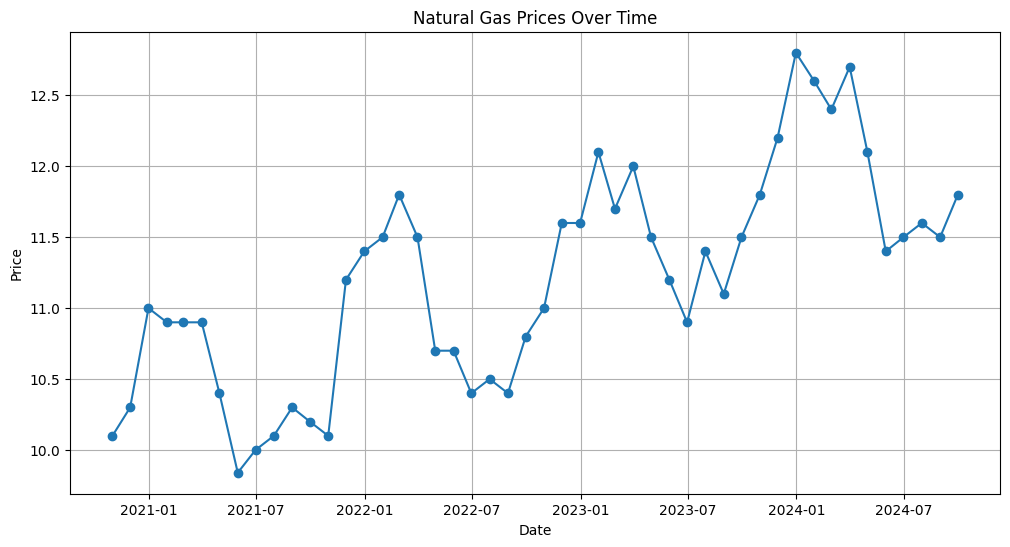

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [46]:
model = LinearRegression()
X = df[['year', 'month']].values
Y = df['Prices'].values
model.fit(X, Y)


LinearRegression()

In [47]:
import statsmodels.api as sm
y = df['Prices']
x = df[['year', 'month']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
coef = model.params
coef

const   -928.491148
year       0.464668
month      0.003465
dtype: float64

In [ ]:
# 2025
def estimate(date):
  if date < datetime.datetime(2024, 9, 30):
    month = date.month
    year = date.year
    return
  else:
    print('Enter a valid date')

In [50]:
df['Dates'].tail(1)

47   2024-09-30
Name: Dates, dtype: datetime64[ns]